In [1]:
2*2

4

# List


In [17]:
vj = ["AI","Automation",12,18,20]
type(vj)

list

In [4]:
len(vj)

5

In [6]:
a = True
type(a)

bool

In [15]:
print("The fav technology of vj is "+(vj[0]))

The fav technology of vj is AI


In [27]:
vj.insert(2,"Selenium")
print(vj)

['AI', 'Automation', 'Selenium', 'Selenium', 12, 18, 20, 'ML', 'ML', 'ML']


In [25]:
vj.append("ML")


In [28]:
vj.remove("ML")

In [29]:
vj

['AI', 'Automation', 'Selenium', 'Selenium', 12, 18, 20, 'ML', 'ML']

# Arrays

In [3]:
import numpy as np

arr = np.array([[1,2,3,4],[3,6,8,9]])

In [36]:
arr

array([[1, 2, 3, 4],
       [3, 6, 8, 9]])

In [40]:
arr[:,1:3]

array([[2, 3],
       [6, 8]])

# Pandas

In [1]:
import pandas as pd
data = pd.read_csv('PastHires.csv')

In [2]:
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [3]:
data.shape

(13, 7)

In [50]:
type(data['Employed?'])

pandas.core.series.Series

In [56]:
data[['Employed?','Hired']]

,Employed?,Hired
0,Y,Y
1,N,Y
2,N,N
3,Y,Y
4,N,N
5,N,Y
6,Y,Y
7,N,Y
8,Y,Y
9,N,N


In [24]:
data['Years Experience'].value_counts()

0     4
15    1
10    1
7     1
4     1
5     1
20    1
3     1
2     1
1     1
Name: Years Experience, dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
Years Experience      13 non-null int64
Employed?             13 non-null object
Previous employers    13 non-null int64
Level of Education    13 non-null object
Top-tier school       13 non-null object
Interned              13 non-null object
Hired                 13 non-null object
dtypes: int64(2), object(5)
memory usage: 808.0+ bytes


In [59]:
data.describe()

,Years Experience,Previous employers
count,13.000000,13.000000
mean,5.153846,1.769231
std,6.348834,2.006400
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,1.000000
75%,7.000000,2.000000
max,20.000000,6.000000


In [61]:
data.corr()

,Years Experience,Previous employers
Years Experience,1.000000,0.644131
Previous employers,0.644131,1.000000


# Seaborn

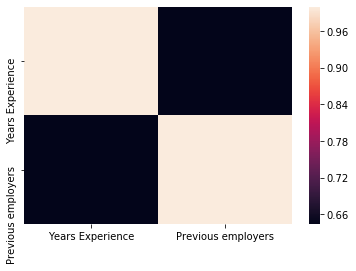

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(data.corr())

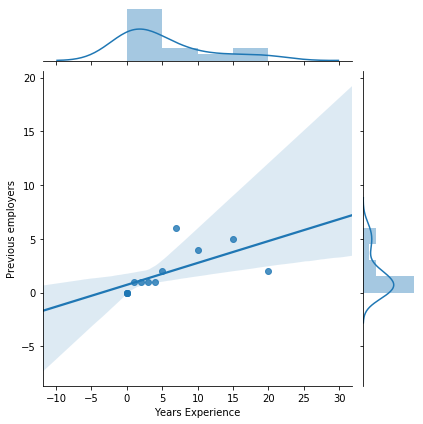

In [3]:
sns.jointplot(x='Years Experience',y='Previous employers',data=data,kind='reg')

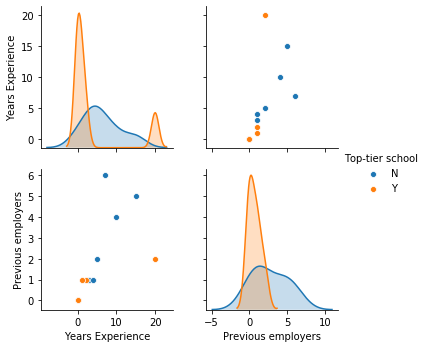

In [18]:
sns.pairplot(data,hue='Top-tier school')

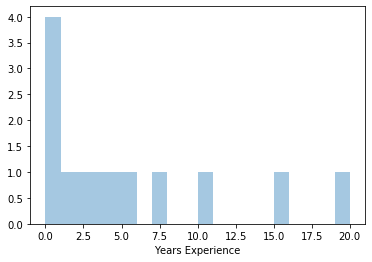

In [23]:
sns.distplot(data['Years Experience'],kde=False,bins=20)

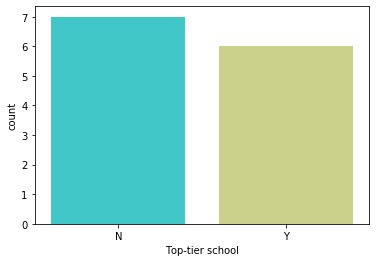

In [42]:
sns.countplot('Top-tier school',data=data,palette='rainbow')

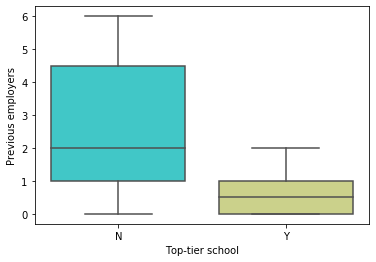

In [36]:
sns.boxplot('Top-tier school','Previous employers',data=data,palette='rainbow')
##Note: Either x or y needs to be numberic

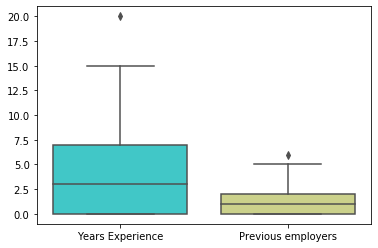

In [39]:
sns.boxplot(data=data,orient='v',palette='rainbow')

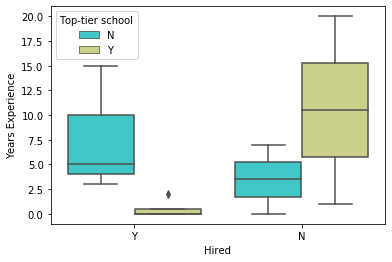

In [46]:
sns.boxplot('Hired','Years Experience',data=data,hue='Top-tier school',palette='rainbow')

# Titanic data practise


In [78]:
titanic_data = pd.read_csv('titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


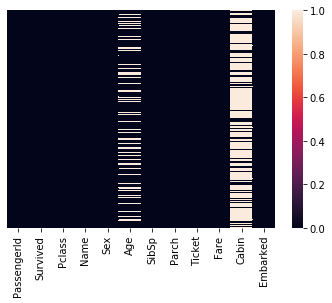

In [79]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

## Data Cleaning

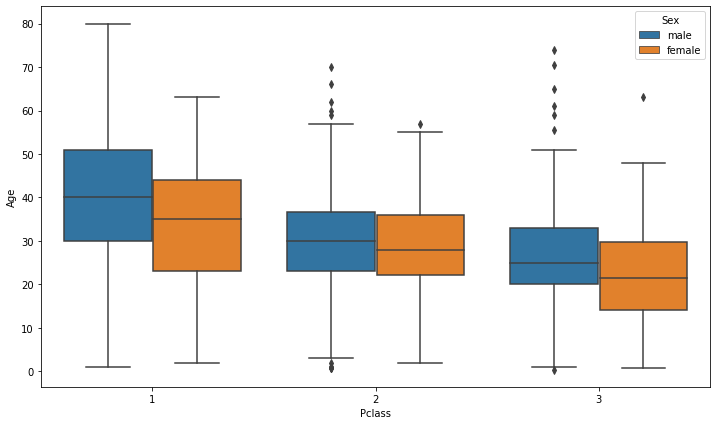

In [80]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,hue='Sex')

In [81]:
def calAgeMean(col):
    Age = col[0]
    Pclass = col[1]
    Sex = col[2]
        
    if Pclass == 3 and Sex == 'female':
        return Age
      

In [82]:
titanic_data['AgeMeanGenderClass'] = titanic_data[['Age','Pclass','Sex']].apply(calAgeMean,axis=1)

In [83]:
titanic_data['AgeMeanGenderClass'].dropna().mean()
# Likewise mean of Age calulated on the basis on Pclass and Sex.

21.75

In [84]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):

        if Pclass == 1 and Sex == 'male':
            return 41
           
        elif Pclass == 1 and Sex == 'female':
            return 34

        elif Pclass == 2 and Sex == 'male':
            return 30
        
        elif Pclass == 2 and Sex == 'female':
            return 28
        
        elif Pclass == 3 and Sex == 'male':
            return 26
        
        elif Pclass == 3 and Sex == 'female':
            return 21

    else:
        return Age

In [85]:
titanic_data['Age'] = titanic_data[['Age','Pclass','Sex']].apply(impute_age,axis=1)

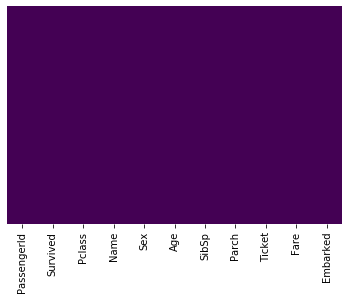

In [86]:
titanic_data.drop('Cabin',axis=1,inplace=True)
titanic_data.drop('AgeMeanGenderClass',axis=1,inplace=True)
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Now all the null vales are removed

## Checking the Outliers

Text(0, 0.5, 'Number of Passengers')

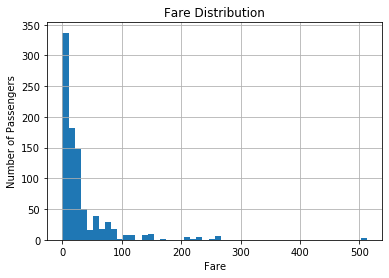

In [87]:
# Let's look at the fare
fig = titanic_data.Fare.hist(bins=50)
fig.set_title('Fare Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

#### The distribution of Fare is skewed, so in principle, we shouldn't estimate outliers using the mean plus minus 3 standard deviations methods, which assumes a normal distribution of the data

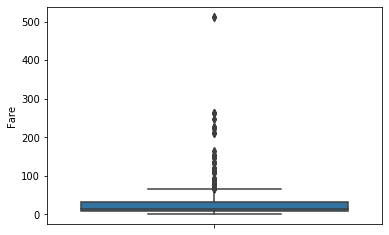

In [88]:
# another way of visualising outliers is using boxplots and whiskers,
# which provides the quantiles (box) and inter-quantile range (whiskers),
# with the outliers sitting outside the error bars (whiskers).

# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule


sns.boxplot(y='Fare',data=titanic_data)

In [89]:
# let's look at the values of the quantiles so we can
# calculate the upper and lower boundaries for the outliers

# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

titanic_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [90]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule

IQR = titanic_data.Fare.quantile(0.75) - titanic_data.Fare.quantile(0.25)

Lower_fence = titanic_data.Fare.quantile(0.25) - (IQR * 1.5)
Upper_fence = titanic_data.Fare.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(65.6344, -26.724, 23.0896)

In [91]:
# And if we are looking at really extreme values
# using the interquantile proximity rule

Lower_fence = titanic_data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = titanic_data.Fare.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(100.2688, -61.358399999999996, 23.0896)

#### The upper boundary for extreme outliers is a cost of 100 dollars for the Fare. The lower boundary is meaningless because there can't be a negative price for Fare.

In [92]:
# lets look at the actual number of passengers on the upper Fare ranges

print('total passengers: {}'.format(titanic_data.shape[0]))

print('passengers that paid more than 65: {}'.format(
    titanic_data[titanic_data.Fare > 65].shape[0]))

print('passengers that paid more than 100: {}'.format(
    titanic_data[titanic_data.Fare > 100].shape[0]))

total passengers: 891
passengers that paid more than 65: 116
passengers that paid more than 100: 53


In [93]:
import numpy as np

In [94]:
# and percentages of passengers
total_passengers = np.float(titanic_data.shape[0])

print('total passengers: {}'.format(titanic_data.shape[0] / total_passengers))

print('passengers that paid more than 65: {}'.format(
    titanic_data[titanic_data.Fare > 65].shape[0] / total_passengers))

print('passengers that paid more than 100: {}'.format(
    titanic_data[titanic_data.Fare > 100].shape[0] / total_passengers))

total passengers: 1.0
passengers that paid more than 65: 0.13019079685746351
passengers that paid more than 100: 0.05948372615039282


#### When using the 3 times interquantile range itnerval to find outliers, we find that 6% of the passengers have paid extremely high fares. We can go ahead and investigate the nature of this outliers.

In [95]:
titanic_data['Ticket'].value_counts()

1601                  7
347082                7
CA. 2343              7
347088                6
3101295               6
CA 2144               6
382652                5
S.O.C. 14879          5
W./C. 6608            4
LINE                  4
347077                4
PC 17757              4
113781                4
17421                 4
2666                  4
19950                 4
349909                4
113760                4
4133                  4
PC 17582              3
PC 17572              3
345773                3
SC/Paris 2123         3
24160                 3
13502                 3
230080                3
347742                3
29106                 3
35273                 3
248727                3
                     ..
350029                1
SOTON/O.Q. 3101306    1
2695                  1
111320                1
2631                  1
372622                1
35852                 1
SC/AH 3085            1
237668                1
347061                1
315098          

#### A group of people who bought their tickets together, say they were a family, would have the same ticket number. And the fare attached to them is no longer the individual Fare, rather the group Fare. This is why, we see this unusually high values:

In [96]:
multiple_tickets = pd.concat(
    [
        titanic_data.groupby('Ticket')['Fare'].count(),
        titanic_data.groupby('Ticket')['Fare'].mean()
    ],
    axis=1)

multiple_tickets.columns = ['Ticket', 'Fare']
multiple_tickets.head(10)

,Ticket,Fare
Ticket,,
110152,3,86.5000
110413,3,79.6500
110465,2,52.0000
110564,1,26.5500
110813,1,75.2500
111240,1,33.5000
111320,1,38.5000
111361,2,57.9792
111369,1,30.0000


 Therefore, the fare should be divided by the number of tickets bought together to find out the individual price. So we see how finding out and investigating the presence of outliers, can lead us to new insight about the dataset at hand.
 Go ahead and divide the Fare by the number of tickets bought together, and then repeat the finding outliers exercise on this newly created variable. Do you know how to do this in python?
 If not, don't worry, I will show you how to calculate individual ticket price in the final lecture of this course in the section "Putting it all together".
 For now, let's just go ahead and visualise a group of people that were seemingly travelling together and therefore bought the tickets together:

In [97]:
# let's have a look at the most extreme outliers
titanic_data[titanic_data.Fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


These three people have the same ticket number, indicating that they were travelling together. The Fare price in this case, 512 is the price of 3 tickets, and not one. This is why, it is unusually high.

Lets create a new column and then calculate new fares based the mean for duplicate ticket ids

In [98]:
titanic_data['NewFare'] = ""

In [99]:
multiple_tickets['NewFare'] = multiple_tickets['Fare']/multiple_tickets['Ticket']
multiple_tickets.NewFare[2]


26.0

In [114]:
for x in range(titanic_data.shape[0]):
    
    for y in range(multiple_tickets.shape[0]):
        if titanic_data.Ticket[x] == multiple_tickets.index[y]:
            #print(DuplicateTicketFare.index[y])
            titanic_data.NewFare[x]  =  multiple_tickets.NewFare[y]

/Users/vijaykumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.05


Now analyze the outliers for 'NewFare' column

In [117]:
IQR = titanic_data.NewFare.quantile(0.75) - titanic_data.NewFare.quantile(0.25)

Lower_fence = titanic_data.NewFare.quantile(0.25) - (IQR * 1.5)
Upper_fence = titanic_data.NewFare.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(49.07675000000001, -17.02605000000001, 16.525700000000004)

In [118]:
IQR = titanic_data.NewFare.quantile(0.75) - titanic_data.NewFare.quantile(0.25)

Lower_fence = titanic_data.NewFare.quantile(0.25) - (IQR * 3)
Upper_fence = titanic_data.NewFare.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(73.86530000000002, -41.81460000000001, 16.525700000000004)

In [119]:
print('total passengers: {}'.format(titanic_data.shape[0]))

print('passengers that paid more than 49: {}'.format(
    titanic_data[titanic_data.NewFare > 49].shape[0]))

print('passengers that paid more than 74: {}'.format(
    titanic_data[titanic_data.NewFare > 74].shape[0]))

total passengers: 891
passengers that paid more than 49: 59
passengers that paid more than 74: 17


In [120]:
total_passengers = np.float(titanic_data.shape[0])

print('total passengers: {}'.format(titanic_data.shape[0] / total_passengers))

print('passengers that paid more than 49: {}'.format(
    titanic_data[titanic_data.NewFare > 49].shape[0] / total_passengers))

print('passengers that paid more than 74: {}'.format(
    titanic_data[titanic_data.NewFare > 74].shape[0] / total_passengers))

total passengers: 1.0
passengers that paid more than 49: 0.06621773288439955
passengers that paid more than 74: 0.019079685746352413


In [121]:
mean = titanic_data.NewFare.mean()
mean

17.78898883277215

In [122]:
median = float(titanic_data["NewFare"].median())
median

8.85

In [123]:
titanic_data["NewFare"] = np.where(titanic_data["NewFare"] >49, median,titanic_data['NewFare'])

# Age 

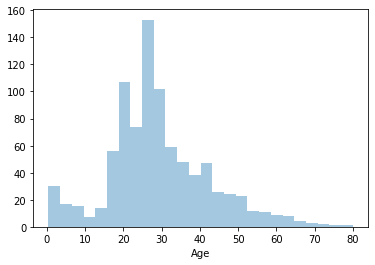

In [39]:
sns.distplot(titanic_data['Age'],kde=False)

As you can see most peaple lie in the age group 20-30

/Users/vijaykumar/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/vijaykumar/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


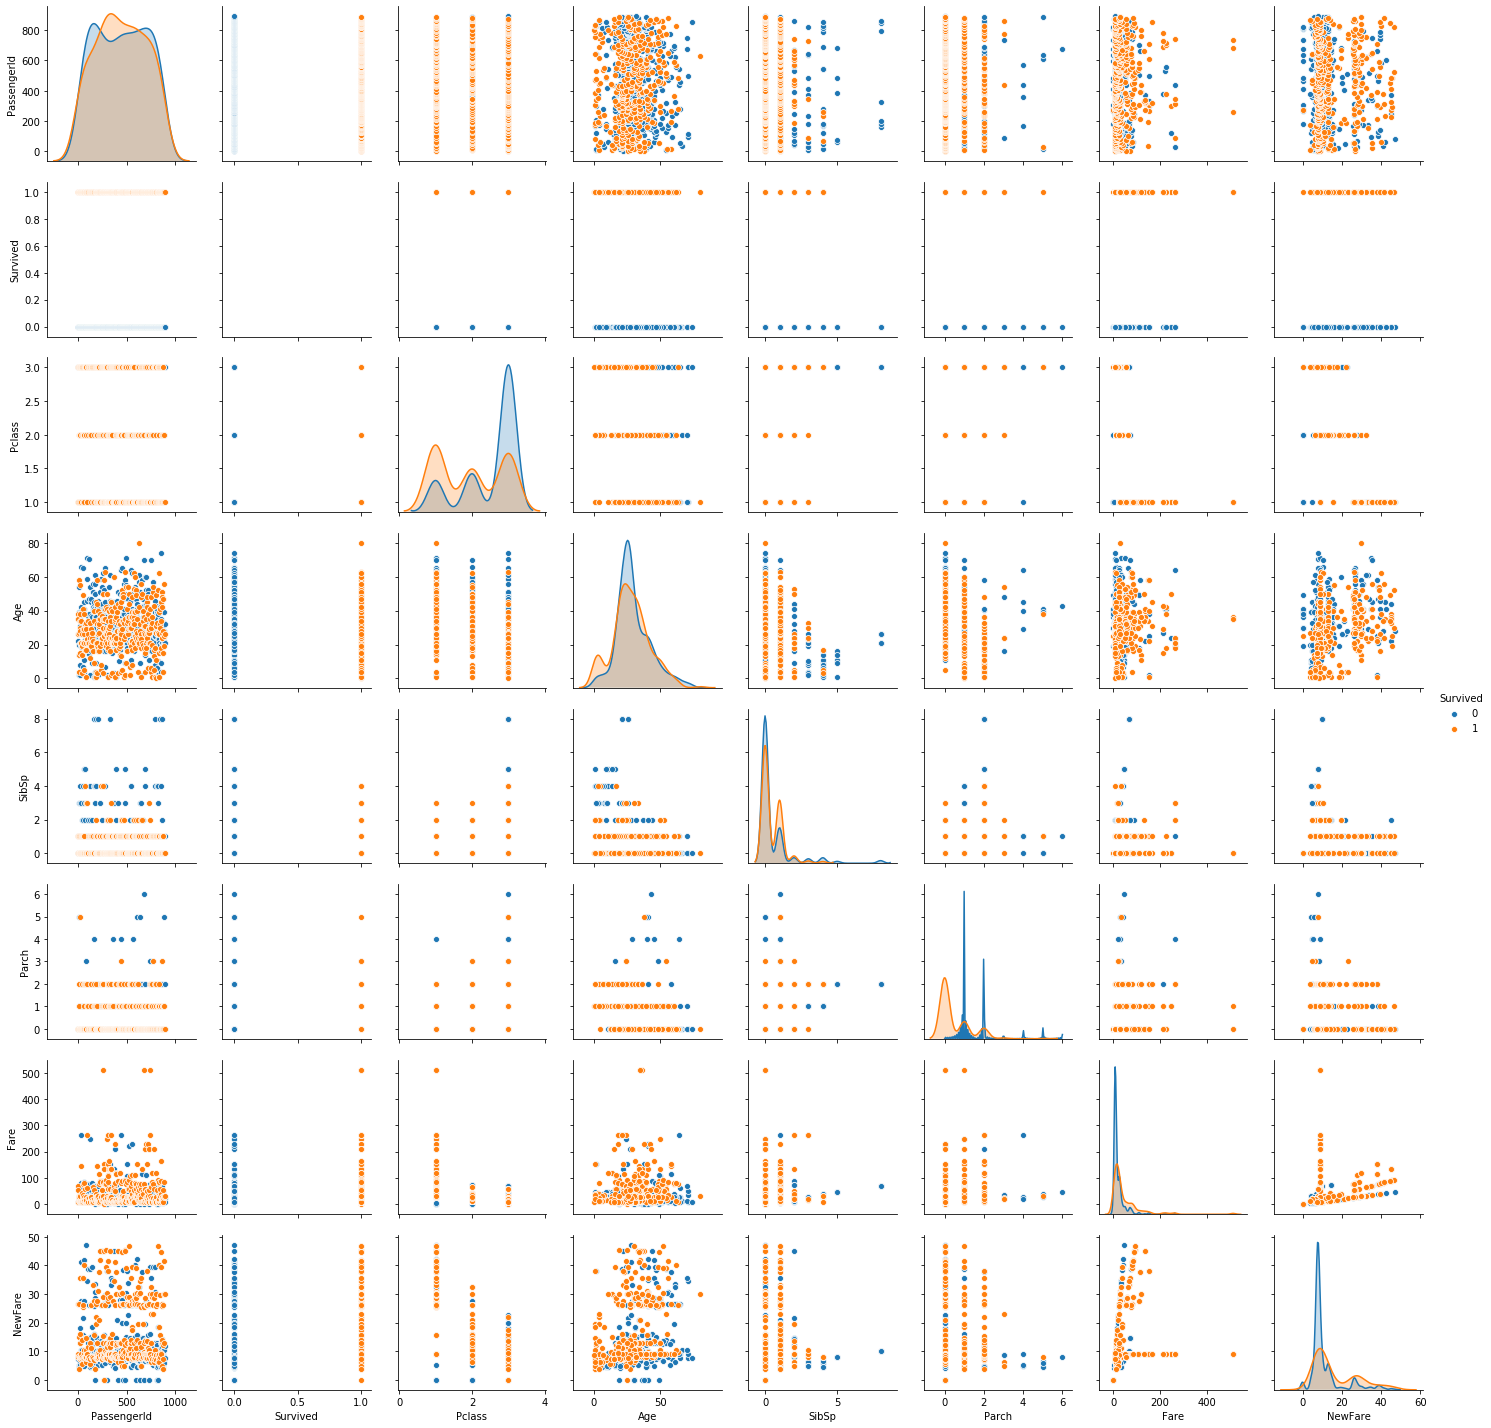

In [40]:
sns.pairplot(titanic_data,hue='Survived')

In [41]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,8.85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.05


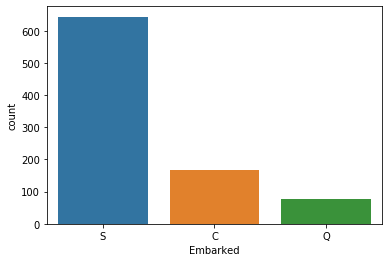

In [42]:
sns.countplot('Embarked',data=titanic_data)

## Converting Categorical features in dumies

In [43]:
pd.get_dummies(titanic_data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [44]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)

In [45]:
titanic_data.drop(['PassengerId','Sex','Embarked','Name','Ticket','Fare'],axis=1,inplace=True)

In [46]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,NewFare
0,0,3,22.0,1,0,7.25
1,1,1,38.0,1,0,8.85
2,1,3,26.0,0,0,7.925
3,1,1,35.0,1,0,26.55
4,0,3,35.0,0,0,8.05


In [47]:
titanic_data = pd.concat([titanic_data,sex,embark],axis=1)

In [48]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,NewFare,male,Q,S
0,0,3,22.0,1,0,7.25,1,0,1
1,1,1,38.0,1,0,8.85,0,0,0
2,1,3,26.0,0,0,7.925,0,0,1
3,1,1,35.0,1,0,26.55,0,0,1
4,0,3,35.0,0,0,8.05,1,0,1


## Now build Logistic regression model

In [49]:
titanic_data.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,NewFare,male,Q,S
0,3,22.0,1,0,7.25,1,0,1
1,1,38.0,1,0,8.85,0,0,0
2,3,26.0,0,0,7.925,0,0,1
3,1,35.0,1,0,26.55,0,0,1
4,3,35.0,0,0,8.05,1,0,1


In [72]:
titanic_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [50]:
titanic_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
titanic_data.corr()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
Survived,1.000000,-0.338481,-0.066539,-0.035322,0.081629,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.410040,0.083081,0.018443,0.131900,0.221009,0.081720
Age,-0.066539,-0.410040,1.000000,-0.251669,-0.178596,0.113290,-0.090562,0.013182
SibSp,-0.035322,0.083081,-0.251669,1.000000,0.414838,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.178596,0.414838,1.000000,-0.245489,-0.081228,0.063036
male,-0.543351,0.131900,0.113290,-0.114631,-0.245489,1.000000,-0.074115,0.125722
Q,0.003650,0.221009,-0.090562,-0.026354,-0.081228,-0.074115,1.000000,-0.496624
S,-0.155660,0.081720,0.013182,0.070941,0.063036,0.125722,-0.496624,1.000000


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data.drop('Survived',axis=1), 
                                                    titanic_data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/vijaykumar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
accuracy=confusion_matrix(y_test,predictions)

In [59]:
accuracy

array([[136,  18],
       [ 39,  75]])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7873134328358209

## Evaluation

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.66      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



## Lets try to Apply Decision tree Algorithm on same data set

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [66]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

let's evaluate our decision tree

In [67]:
predictions = dtree.predict(X_test)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [69]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [70]:
conf_matrix,accuracy

(array([[130,  24],
        [ 33,  81]]), 0.7873134328358209)

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       154
           1       0.77      0.71      0.74       114

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

